### Импорт пакетов

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
path = '../data/'

### Зависимость мощности излучения от мощности накачки
Мы это прямо померили

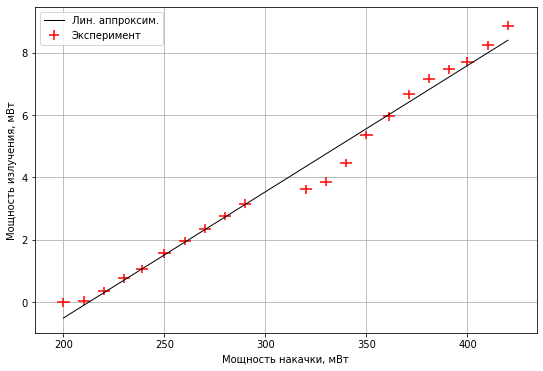

In [33]:
# считывание данных
data1 = np.genfromtxt('%sdata1.txt'%path)

p_n = data1[:, 0]  # накачка
p_iz = data1[:, 1]  # излучение

p_iz -= p_iz[-1]  # учёт фоновой засветки

# погрешности, выбраны из соображения, что там всё "дышало"
p_n_err = np.ones(len(p_iz)) * 3  # мВт
p_iz_err = np.ones(len(p_iz)) * 14e-2  # мВт, взял за погрешность величину фоновой засветки

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1, 1, 1)

ax.errorbar(p_n, p_iz, xerr=p_n_err, yerr=p_iz_err, label='Эксперимент', ls='', color='red', ms=4)

p1 = np.poly1d(np.polyfit(p_n, p_iz, 1))
ax.plot(p_n, p1(p_n), color='black',
        linestyle='-', label='Лин. аппроксим.', lw=1)

ax.set_ylabel('Мощность излучения, мВт')
ax.set_xlabel('Мощность накачки, мВт')

ax.grid()
ax.legend()

Отсюда видно, что мощность излучения уходит в нуль при уменьшении мощности накачки. Мощность излучения совсем зануляется при $$P_{нак}<210\,\text{мВт}.$$ Порог находится где-то между $200\,\text{мВт}$ и $210\,\text{мВт}$. Значит, $P_{пор} = 205\pm5\,\text{мВт}.$

### Погрешность параметра накачки

Параметр накачки по определению $A = P_{нак} / P_{пор}$. Погрешность будет 
$$
\Delta A = \dfrac{\Delta P_{нак}}{P_{пор}} + P_{нак} \dfrac{\Delta P_{пор}}{P_{пор}^2} = \dfrac{3}{205} + P_{нак} \dfrac{5}{205^2}.
$$
Погрешность параметра накачки хоть и слабо, но зависит от мощности накачки.

### Зависимость мощности излучения от параметра накачки

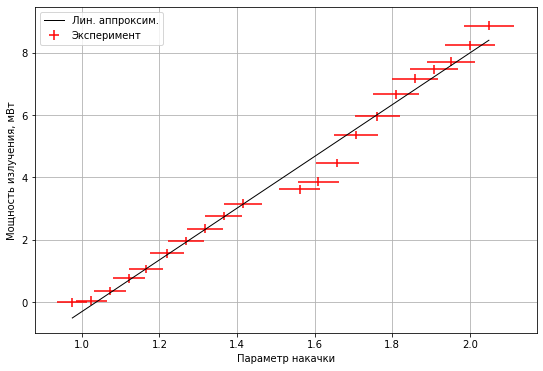

In [34]:
A = p_n / 205  # параметр накачки
A_err = 3 / 205 + p_n * 5 / 205**2

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1, 1, 1)

ax.errorbar(A, p_iz, xerr=A_err, yerr=p_iz_err, label='Эксперимент', ls='', color='red', ms=4)

p1 = np.poly1d(np.polyfit(A, p_iz, 1))
ax.plot(A, p1(A), color='black', linestyle='-', label='Лин. аппроксим.', lw=1)

ax.set_ylabel('Мощность излучения, мВт')
ax.set_xlabel('Параметр накачки')

ax.grid()
ax.legend()

### Зависимость релаксационной частоты от параметра накачки
Релаксационная частота $\Omega = 2\pi \nu T_1$, мы меряем $\nu = f_{rel}$

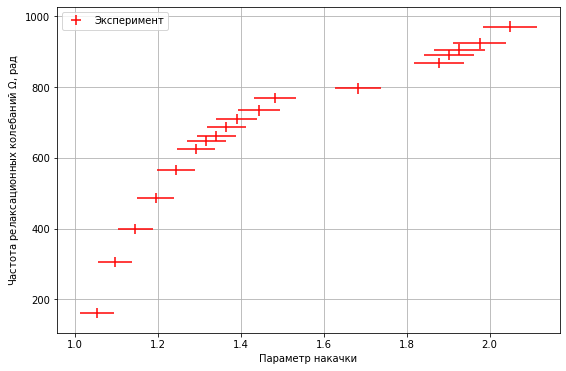

In [45]:
# загружаем данные
data2 = np.genfromtxt('%sdata2.txt'%path)

p_n_2 = data2[:, 0]  # мощность накачки
f_rel = data2[:, 1]  # частота релаксационный колебаний

# погрешности
p_n_2_err = np.ones(len(p_n_2)) * 3  # мВт
f_rel_err = np.ones(len(p_n_2)) * 10  # кГц

A_2 = p_n_2 / 205  # параметр накачки
A_2_err = p_n_2_err / 205 + p_n_2 * 5 / 205**2

T_1 = 0.23  # мс
Omega = 2 * np.pi * f_rel * T_1

Omega_err = 2 * np.pi * f_rel_err * T_1

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1, 1, 1)

ax.errorbar(A_2, Omega, xerr=A_2_err, yerr=Omega_err, label='Эксперимент', ls='', color='red', ms=4)

#p1 = np.poly1d(np.polyfit(A, p_iz, 1))
#ax.plot(A, p1(A), color='black', linestyle='-', label='Лин. аппроксим.', lw=1)

ax.set_ylabel(r'Частота релаксационных колебаний $\Omega$, рад')
ax.set_xlabel('Параметр накачки')

ax.grid()
ax.legend()

### Зависимость параметра $G$ от параметра накачки

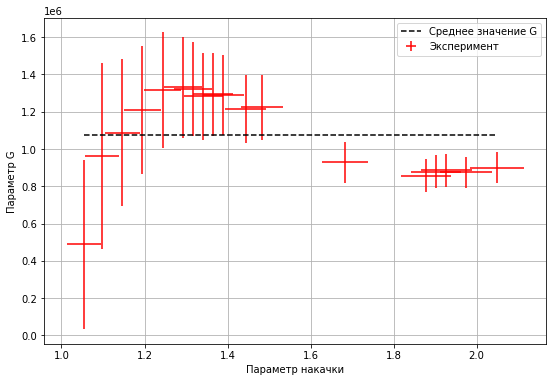

In [43]:
G = Omega**2 / (A_2 - 1)

G_err = 2 * Omega * Omega_err / (A_2 - 1) + Omega**2 * A_2_err / (A_2 - 1)**2

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1, 1, 1)

ax.errorbar(A_2, G, xerr=A_2_err, yerr=G_err, label='Эксперимент', ls='', color='red', ms=4)
ax.plot(A_2, np.ones(len(A_2))*G.mean(), color='black', linestyle='--', label='Среднее значение G')

#p1 = np.poly1d(np.polyfit(A, p_iz, 1))
#ax.plot(A, p1(A), color='black', linestyle='-', label='Лин. аппроксим.', lw=1)

ax.set_ylabel('Параметр G')
ax.set_xlabel('Параметр накачки')

ax.grid()
ax.legend()

In [44]:
G.mean()

1074524.7475126826